<a href="https://colab.research.google.com/github/nqtien12/AI/blob/main/Week12_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!ls -la face_recognition/tests/test_images/

ls: cannot access 'face_recognition/tests/test_images/': No such file or directory


In [15]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN

In [19]:
filename = '/content/drive/MyDrive/AI/A7.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

3/3 [==============================] - 0s 45ms/step
{'box': [466, 286, 37, 49], 'confidence': 0.9999982118606567, 'keypoints': {'left_eye': (476, 304), 'right_eye': (494, 304), 'nose': (487, 314), 'mouth_left': (478, 323), 'mouth_right': (493, 323)}}
{'box': [236, 71, 34, 45], 'confidence': 0.9999940395355225, 'keypoints': {'left_eye': (246, 88), 'right_eye': (261, 88), 'nose': (254, 96), 'mouth_left': (247, 106), 'mouth_right': (260, 106)}}
{'box': [315, 276, 33, 46], 'confidence': 0.9999889135360718, 'keypoints': {'left_eye': (325, 294), 'right_eye': (340, 295), 'nose': (332, 303), 'mouth_left': (325, 312), 'mouth_right': (338, 312)}}
{'box': [578, 84, 33, 42], 'confidence': 0.9999651908874512, 'keypoints': {'left_eye': (587, 99), 'right_eye': (604, 99), 'nose': (596, 106), 'mouth_left': (589, 115), 'mouth_right': (603, 115)}}
{'box': [130, 256, 38, 51], 'confidence': 0.9998569488525391, 'keypoints': {'left_eye': (141, 275), 'right_eye': (158, 276), 'nose': (150, 285), 'mouth_left': 

3/3 [==============================] - 0s 6ms/step


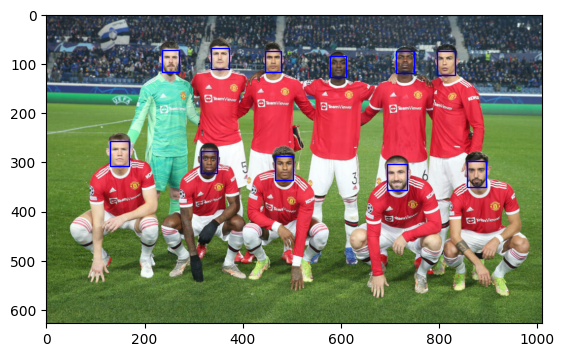

In [21]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN
filename='/content/drive/MyDrive/AI/A7.jpg'
img=plt.imread(filename)# Doc file
detector = MTCNN()
faces=detector.detect_faces(img)

plt.imshow(img)

ax = plt.gca()
for face in faces:
  x, y, width, height = face['box'] # Ve hinh chu nhat 
  rect = plt.Rectangle((x,y), width, height, fill = False, color = 'blue')
  ax.add_patch(rect) # chồng ảnh lên, bắt buộc phải có

plt.show()

2/2 [==============================] - 0s 88ms/step


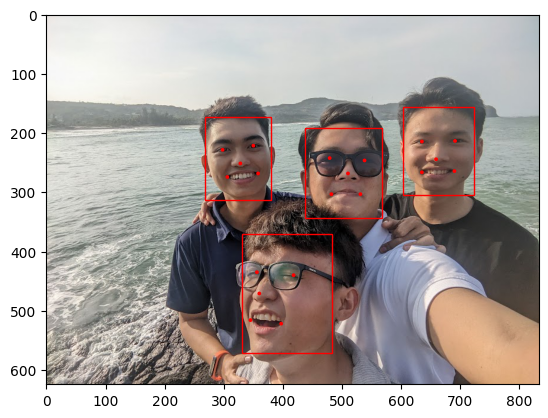

In [22]:
filename = '/content/drive/MyDrive/AI/PXL_20230303_090723220.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)

plt.imshow(img)
ax = plt.gca()

for face in faces:
  x,y,width,height = face['box']
  rect = plt.Rectangle((x,y),width,height,fill = False, color = 'red')
  ax.add_patch(rect)
  for key, value in face['keypoints'].items():
    dot = plt.Circle(value, radius = 2, color = 'red')
    ax.add_patch(dot)
plt.show()

2/2 [==============================] - 0s 7ms/step


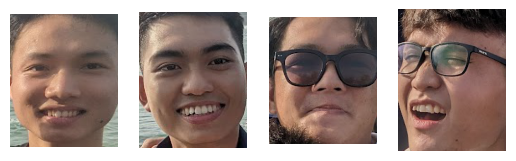

In [23]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def draw_faces(filename, result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height = result_list[i]['box']
    x2,y2 = x1 + width, y1 + height
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()

filename = '/content/drive/MyDrive/AI/PXL_20230303_090723220.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename, faces)

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/AI/Cho.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

1/1 [==============================] - 0s 124ms/step
Predicted: [('n02110958', 'pug', 0.86086434), ('n02108422', 'bull_mastiff', 0.091587104), ('n02109525', 'Saint_Bernard', 0.010523184), ('n02086079', 'Pekinese', 0.01027918), ('n02112706', 'Brabancon_griffon', 0.005914394)]


In [51]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/AI/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

1/1 [==============================] - 0s 122ms/step
Predicted: [('n02110958', 'pug', 0.86086434), ('n02108422', 'bull_mastiff', 0.091587104), ('n02109525', 'Saint_Bernard', 0.010523184), ('n02086079', 'Pekinese', 0.01027918), ('n02112706', 'Brabancon_griffon', 0.005914394)]


In [52]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/AI/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02091244', 'Ibizan_hound', 0.34294873), ('n01877812', 'wallaby', 0.11662913), ('n02109961', 'Eskimo_dog', 0.1059996)]
